Yennifer Yuliana Guerrero Uchima
Anny Zurley Diosa Castañeda

Campo eléctrico

Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

a. Encontrar el campo en un punto producido por dos cargas q1 y q2

b. Emplee el comando plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
c. Generalice el problema para varios puntos en el espacio.
Se recomienda emplear numpy array.

In [16]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
ke = 1

def E_campo(rp,q, rq ):
  """
  Magnitud del campo electrico
  """
  Delta_R =  rp - rq #rsource
  r=np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  ur=Delta_R/r
  return (ke*q/r**2)*ur   #devuelve el campo

In [3]:
r_source = {'q1':1,"r1": np.array([-1, 0]),'q2':-1,"r2":np.array([1.,0])}
rp       = np.array([1.,1])  # Punto para encontrar el campo electrico

In [4]:
campo2=E_campo(rp,r_source["q2"],r_source["r2"])
campo1=E_campo(rp,r_source["q1"],r_source["r1"])

E=campo2+campo1   # Campo neto en el punto rp

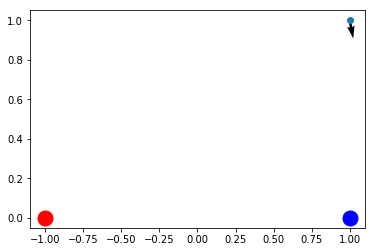

In [5]:
plt.figure()
plt.plot(r_source["r1"][0], r_source["r1"][1], "ro",markersize=15)#posicion de q1
plt.plot(r_source["r2"][0], r_source["r2"][1],'bo',markersize=15)#posicion de q2
plt.plot(rp[0], rp[1],"o")#punto donde encuentro el campo
plt.quiver(rp[0], rp[1],E[0],E[1])#graficar la flecha

In [6]:
#campo generado por un dipolo sobre una malla

# Definir los puntos donde se se determinara el campo electrico 

x  = np.linspace(-3, 3, 20)
n1 = len(x)
y  = np.linspace(-3, 3, 20)
n2 = len(y)
#arange crea un array desde [inicio,final),paso

In [7]:
rp = np.zeros((n1*n2 , 2)) #matriz
k = 0
for x_ in (x):
  for y_ in (y):
    rp[k] = np.array([x_, y_]) # se guaradar los vectores x_,y_
    k=k+1
    



In [10]:
#campo generado por q1 sobre todos los puntos


E1= np.zeros((n1*n2, 2))
#En esta matriz se incluirán los valores del campo

for i in range(0, len(rp)):
    E1[i] = E_campo(rp[i],r_source["q1"],r_source["r1"])


In [11]:
#Campo generado por q2 sobre todos los puntos

E2 = np.zeros((n1*n2, 2))
#En esta matriz se incluirán los valores del campo

for i in range(0, len(rp)):
  E2[i] =E_campo(rp[i],r_source["q2"],r_source["r2"])
 


In [12]:
E=E1+E2 #campo neto sobre todos los puntos

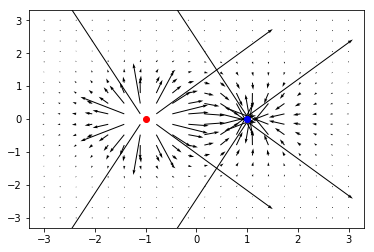

In [13]:
plt.figure()
plt.plot(r_source["r1"][0], r_source["r1"][1], "ro")#posiscion de q1
plt.plot(r_source["r2"][0], r_source["r2"][1], "bo")#posicion de q2
plt.quiver(rp[:,0], rp[:,1], E[:,0], E[:,1])


#### Utilizando la función "streamplot()" donde creamos una malla usando "meshgrid()"

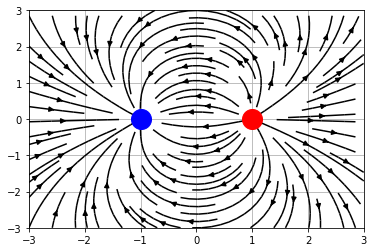

In [19]:
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)

#Hacemos el grid
X,Y = np.meshgrid(x,y)

#Carga 1:
x1=-1
y1=0
#Carga 2:
x2=1
y2=0

Ex1= -(X-x1)/((X-x1)**2+(Y-y1)**2)**1.5
Ey1= -(Y-y1)/((X-x1)**2+(Y-y1)**2)**1.5

Ex2= +(X-x2)/((X-x2)**2+(Y-y2)**2)**1.5
Ey2= +(Y-y2)/((X-x2)**2+(Y-y2)**2)**1.5


plt.plot(x1,y1,'o',color='blue',markersize=20)
plt.plot(x2,y2,'o',color='red',markersize=20)
plt.streamplot(X,Y,Ex1+Ex2,Ey1+Ey2,color='black')
plt.grid()

"""Movimiento parabólico.

Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta.
Elabore un programa en el que dada una distancia, velocidad inicial y ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón.

Se recomienda emplear numpy array. """

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Se toma como sistema de referencia el punto desde donde es lanzado el balón, entonces:

$$x_0=0 $$  $$y_0=0$$

Y la posición x de la cesta es d.

La trayectoria del balón es descrita por una función cuadrática, y las condiciones para que llegue al punto de cesta son:

* Sobre el eje x recorra una distancia d (distancia a la que se encuantra inicialmente de la cesta):

$$d=x_0 + v_0 cos (\theta) t \quad (1)$$ 

* Sobre el  eje y, que recorra una h (altura de la cesta):

$$h=y_0+v_0 sen (\theta) t - \frac{1}{2} g t^2 \quad (2)$$

Ambas condiciones en un mismo tiempo t.

Podemos despejar el tiempo t en la ecuación (1) y reesmplazar sobre la ecuación de posición en y del balón. Si este resultado es igual a h, entonces el balón alcanzó la cesta. 


In [4]:

print("ingrese la distancia horizontal a la que se encuentra respecto a la cancha:")
d=float(input())

print("ingrese la rapidez inicial en metros por segundo")
v0=float(input())
    
print("ingrese el angulo del tiro respecto a la horizontal")
tet=float(input())

ingrese la distancia horizontal a la que se encuentra respecto a la cancha:
5
ingrese la rapidez inicial en metros por segundo
10
ingrese el angulo del tiro respecto a la horizontal
45


In [5]:
x0=0 #punto desde donde se lanza el balón
y0=0 #punto vertical desde donde se lanza el balon
h=2
teta=tet*(np.pi*(1/180))
t=(d-x0)/(v0*(np.cos(teta)))
y=y0+v0*(np.sin(teta))*t-(0.5)*(9.8)*(t**2)
if y==h:
    print("Hay cesta")
else:
    print("no hay cesta")

no hay cesta


teniendo en cuenta el radio de la cesta

Se toma como sistema de referencia el punto desde donde es lanzado el balón, entonces:

$$x_0=0 $$  $$y_0=0$$

Y la posición x de la cesta es d.

Ahora las condiciones para que llegue a la cesta es que la posición en x este en el intervalo
$$(d-(radio de la cesta), d)$$
Para esto se usará el arange con paso de 0,01 que genere un array de posiciones a las que se evalua el respectivo tiempo.

La otra condición es que con los el tiempo estimado para cada posición el balón alcance una altura de h con un error de 0,01m.

In [6]:
print("ingrese la distancia horizontal a la que se encuentra respecto a la cancha:")
d=float(input())

print("ingrese la rapidez inicial en metros por segundo")
v0=float(input())
    
print("ingrese el angulo del tiro respecto a la horizontal")
tet=float(input())

ingrese la distancia horizontal a la que se encuentra respecto a la cancha:
9
ingrese la rapidez inicial en metros por segundo
30
ingrese el angulo del tiro respecto a la horizontal
40


In [7]:
x0=0 #punto desde donde se lanza el balón
y0=0 #punto vertical desde donde se lanza el balon
h=3 #altura de la cesta en metros
teta=tet*(np.pi*(1/180))#angulo de lanzamiento en radianes

#diametro de la cesta 0.2m
di=d-0.2
#puntos sobre en los que es posible que halla cesta
X=np.arange(di,d,0.01)

#se miden los respectivos tiempos

t=(X-x0)/(v0*(np.cos(teta)))

#se envaluan los tiempos sobre el eje y

Y=y0+v0*(np.sin(teta))*t-(0.5)*(9.8)*(t**2)  
Y=np.round(Y, 2)#redondeo a dos cifras decimales

#se verifica si alguna de las (y) obtenida conicida con h
#tomando dos cifras decimales

for y in Y:
    if y>=(h-0.01) and y<=(h+0.01):
        print("Hay cesta")#condición para entrar a la cesta
print("no hay cesta")    
  

no hay cesta


Yennifer Yuliana Guerrero Uchima
Anny Zurley Diosa Catañeda